##Unzipping the Dataset##

In [1]:
!unzip /content/drive/MyDrive/UTKFace.zip

Streaming output truncated to the last 5000 lines.
  inflating: UTKFace/52_0_3_20170113184200775.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170113190623929.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170117190840617.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119160357804.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119181010188.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119200211340.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119200241996.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119200259595.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119200407188.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119204331863.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119204337838.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119205638160.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119205639336.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119205641007.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119205647136.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_201701

##Import Modules##

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

##Load the Dataset##

In [3]:
BASE_DIR = '/content/UTKFace'

In [4]:
# labels - age, gender, ethnicity
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

  0%|          | 0/23710 [00:00<?, ?it/s]

In [5]:
# convert to dataframe
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

,image,age,gender
0,/content/UTKFace/58_1_0_20170120224803945.jpg....,58,1
1,/content/UTKFace/45_1_0_20170117152126596.jpg....,45,1
2,/content/UTKFace/26_1_1_20170116234835737.jpg....,26,1
3,/content/UTKFace/7_1_0_20170109201718572.jpg.c...,7,1
4,/content/UTKFace/9_1_0_20170109204754719.jpg.c...,9,1


##Finding Index of Our Images

In [6]:
# Finding index of our images
pd.set_option('display.max_rows', None)
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.loc[df['age'] == 20, :]

,image,age,gender
530,/content/UTKFace/20_0_4_20170117203144623.jpg....,20,0
635,/content/UTKFace/20_0_1_20170113132727849.jpg....,20,0
653,/content/UTKFace/20_0_1_20170113133037011.jpg....,20,0
719,/content/UTKFace/20_0_1_20170113175209394.jpg....,20,0
745,/content/UTKFace/20_1_4_20170103224540624.jpg....,20,1
780,/content/UTKFace/20_0_1_20170113132706143.jpg....,20,0
985,/content/UTKFace/20_1_4_20170103233719339.jpg....,20,1
1073,/content/UTKFace/20_0_4_20170105161709125.jpg....,20,0
1135,/content/UTKFace/20_1_0_20170116212316301.jpg....,20,1
1188,/content/UTKFace/20_1_3_20170104231832057.jpg....,20,1


In [28]:
pd.set_option('display.max_rows', None)
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.loc[df['age'] == 19, :]

,image,age,gender
193,/content/UTKFace/19_1_3_20170119145633822.jpg....,19,1
439,/content/UTKFace/19_1_0_20170119145731470.jpg....,19,1
594,/content/UTKFace/19_1_0_20170109193136416.jpg....,19,1
747,/content/UTKFace/19_1_1_20170112231417629.jpg....,19,1
911,/content/UTKFace/19_1_3_20170104221847479.jpg....,19,1
1164,/content/UTKFace/19_1_1_20170117195435822.jpg....,19,1
1414,/content/UTKFace/19_1_0_20170112231655238.jpg....,19,1
1763,/content/UTKFace/19_1_3_20170104231315881.jpg....,19,1
2425,/content/UTKFace/19_0_0_20170113132641873.jpg....,19,0
2481,/content/UTKFace/19_0_2_20170102234958195.jpg....,19,0


In [7]:
# map labels for gender
gender_dict = {0:'Male', 1:'Female'}

##Exploratory Data Analysis##

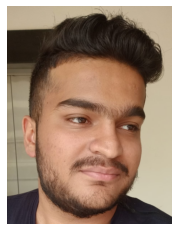

In [8]:
from PIL import Image
img = Image.open(df['image'][9293])
plt.axis('off')
plt.imshow(img);

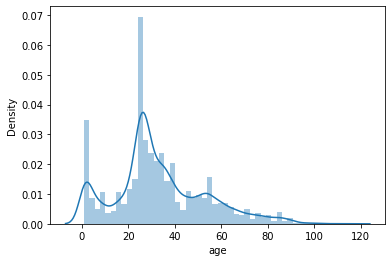

In [9]:
sns.distplot(df['age'])

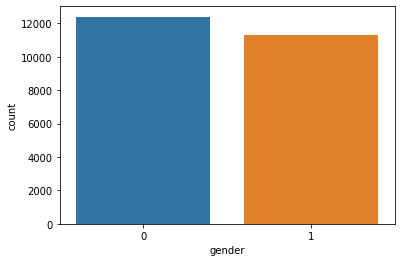

In [10]:
sns.countplot(df['gender'])

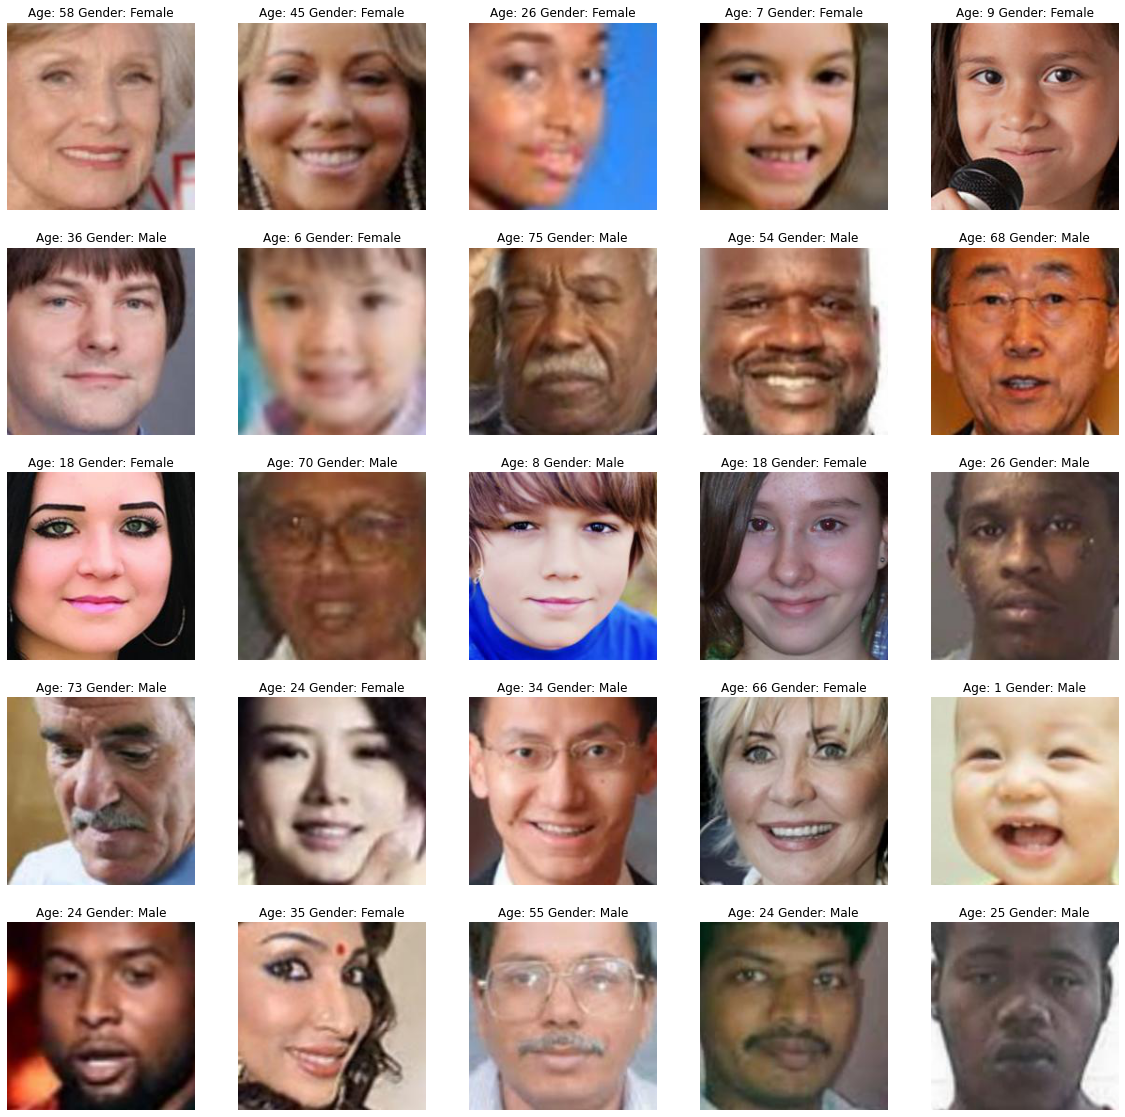

In [11]:
# to display grid of images
plt.figure(figsize=(20, 20))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

##FEATURE EXTRACTION##

In [12]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [13]:
X = extract_features(df['image'])

  0%|          | 0/23710 [00:00<?, ?it/s]

In [14]:
X.shape

(23710, 128, 128, 1)

In [15]:
X = X/255.0  #normailizing images

In [16]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [17]:
input_shape = (128, 128, 1)

##CREATING THE MODEL##

In [18]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])

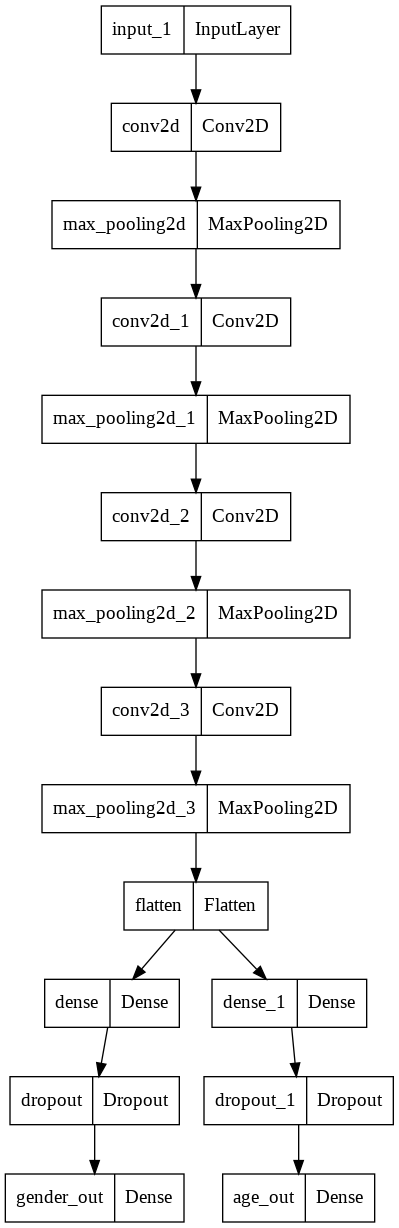

In [19]:
from tensorflow.keras.utils import plot_model  #plotting the model
plot_model(model)

##TRAINING THE MODEL##

In [20]:
# train model
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
593/593 [==============================] - 23s 24ms/step - loss: 15.3718 - gender_out_loss: 0.6483 - age_out_loss: 14.7235 - gender_out_accuracy: 0.6010 - age_out_accuracy: 0.0466 - val_loss: 11.4201 - val_gender_out_loss: 0.5050 - val_age_out_loss: 10.9151 - val_gender_out_accuracy: 0.7520 - val_age_out_accuracy: 0.0331
Epoch 2/30
593/593 [==============================] - 13s 22ms/step - loss: 10.9592 - gender_out_loss: 0.4633 - age_out_loss: 10.4959 - gender_out_accuracy: 0.7806 - age_out_accuracy: 0.0214 - val_loss: 9.5883 - val_gender_out_loss: 0.4188 - val_age_out_loss: 9.1696 - val_gender_out_accuracy: 0.8079 - val_age_out_accuracy: 0.0150
Epoch 3/30
593/593 [==============================] - 14s 24ms/step - loss: 9.4971 - gender_out_loss: 0.3999 - age_out_loss: 9.0972 - gender_out_accuracy: 0.8163 - age_out_accuracy: 0.0117 - val_loss: 9.6577 - val_gender_out_loss: 0.3778 - val_age_out_loss: 9.2799 - val_gender_out_accuracy: 0.8155 - val_age_out_accuracy: 0.0118
Epoc

##Plotting Results##

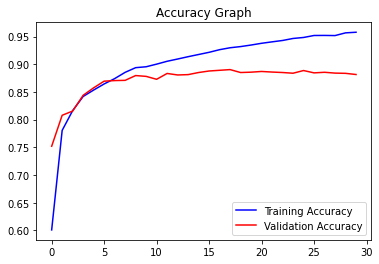

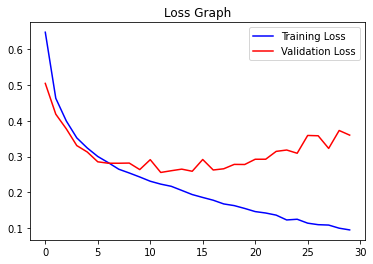

In [21]:
# plot results for gender
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

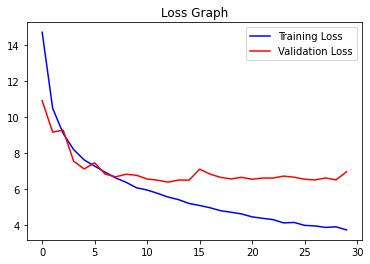

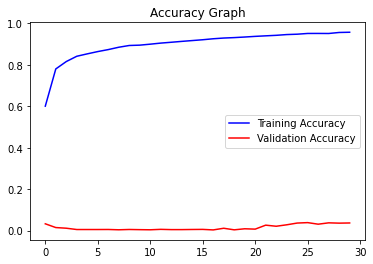

<Figure size 432x288 with 0 Axes>

In [22]:
# plot results for age
loss = history.history['age_out_loss']
val_loss = history.history['val_age_out_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

accura = history.history['age_out_accuracy']
val_accura = history.history['val_age_out_accuracy']
epochs = range(len(accura))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_accura, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()
plt.show()

##Prediction with Test Data##



Original Gender: Male Original Age: 19
1/1 [==============================] - 0s 56ms/step
Predicted Gender: Male Predicted Age: 18


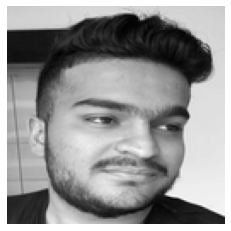

In [24]:
image_index = 9293
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Female Original Age: 20
1/1 [==============================] - 0s 16ms/step
Predicted Gender: Female Predicted Age: 20


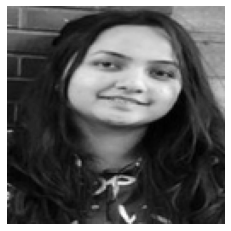

In [25]:
image_index = 12448
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Female Original Age: 25
1/1 [==============================] - 0s 15ms/step
Predicted Gender: Female Predicted Age: 24


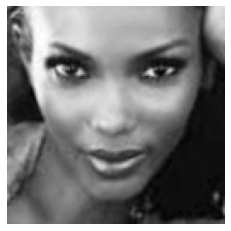

In [27]:
image_index = 2000
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');